In [1]:
import pandas as pd


data = pd.read_csv('power.csv')

#Если в файле нет заголовка или разделителем является другой символ (например, табуляция),
#то эти параметры можно указать при чтении файла

#data = pd.read_csv('power.csv', names = ['country', 'year', 'quantity', 'category'], sep = '\t')

data.head() # первые пять строк

data.tail(10) # указывает десять последних строк

#len(data) # сколько строк


ModuleNotFoundError: No module named 'pandas'

In [2]:
%%time #время выполнения кода 
data = pd.read_csv('power.csv')
len(data)

UsageError: Can't use statement directly after '%%time'!


In [ ]:
import pandas as pd
data = pd.read_csv('power.csv')

data.info() # выводит инфу
data.shape   # количество строк и столбцов датафрейма 



In [ ]:
data.describe() #Для числовых столбцов можно сразу узнать более детальную статист

"""
count - число непустых ячеек
mean - среднее значение значений столбца
std - стандартное отклонение
min и max - минимальное и максимальное значение в столбце
25%, 50%, 75% - квантили
"""

In [ ]:
data['country'].unique() # какие значения вообще принимает столбец категорий

In [ ]:
len(data['country'].unique()) #точное их число 

In [ ]:
data['country'].value_counts() # сколько записей в датафрейме имеет каждая страна

In [ ]:
data['quantity'].mean() 
sum(data['quantity']) / len(data)


In [ ]:
country_stats = data.filter(items = ['country', 'quantity'])  #позволяет фильтровать датафрейм по столбцам и индексам 
country_stats.head()  

In [ ]:
average_level = data['quantity'].mean()
average_level

country_stats.query('quantity > 184264.77005012965').head() # отфильтруем строки. 
#у которых значение столбца quantity превышает среднее потребление 



In [ ]:
'quantity > {}'.format(average_level)
above_average = country_stats.query('quantity > {}'.format(average_level))  # удобнее через format
above_average

In [ ]:
data[ data['quantity'] > average_level ].tail()

In [ ]:
len(data.country.unique())

#используем метод str.contains('подстрока'). Он позволяет оставить только те строки, которые содержат слово 'подстрока'.
#Параметр case=False означает, что поиск будет производиться без учета регистра букв:
data[ data['country'].str.contains('rus', case=False) ]['country'].unique() 


In [ ]:
#Если требуется выполнение хотя бы одного условия, то используем оператор |.
#data[ (условие1) | (условие 2) | (условие 3) ... 
#Если требуется одновременное выполнение условий, то вместо | ставим &:
#data[ (условие1) & (условие 2) & (условие 3) ... ]

filtered_countries = data[ (data['country']=='Russian Federation') | (data['country']=='Belarus') ]
filtered_countries.head()


In [ ]:
#ФИЛЬТР НА СТРОКИ И СТОЛБЦЫ
#метод loc дополняет предыдущий способ фильтрации возможностью добавлять условия на столбцы.
data.loc[100:105, ['country', 'quantity']]
# или требуется получить значения столбца для определенного фильтра
data.loc[data['year'] == 2014, 'quantity']


In [ ]:
#СОРТИРОВКА ПО СТОЛБЦУ
# сортировки значений по столбцам в Pandas используется метод sort_values
data.sort_values(by='quantity').head()

data.sort_values(by='quantity', ascending=False) #по убыванию

#СОРТИРОВКА ПО НЕСКОЛЬКИМ СТОЛБЦАМ
data.sort_values(by=['country', 'year'], ascending=[True, True]).head()  

In [ ]:
#. Переназначить переменной data новое значение:
data = data.sort_values(by=['country', 'year', 'quantity'], ascending=[True, True, False])
data
#Или использовать параметр inplace 
data.sort_values(by=['country', 'year', 'quantity'], ascending=[True, True, False], inplace=True)
data


In [ ]:
# посчитать заданную метрику по данным файла power.csv: каково суммарное
# потребление стран Прибалтики  категорий 4, 12 и 21 за период с 2005 по 2010 года
data = pd.read_csv('power.csv')
# Выясним, как в датафрейме называются Литва, Латвия и Эстония
countries = [ x for x in data['country'].unique() if 'Lit' in x or 'Lat' in x or 'Est' in x]
countries

In [ ]:
# Оставляем только те строки датафрейма, которые содержат 'Lithuania', 'Latvia', 'Estonia'
filtered_countries = data[ (data['country']=='Lithuania') | (data['country']=='Latvia')
                         | (data['country'] == 'Estonia')]

# Оставьте в датафрейме только те строки, 
# год которых приходится на период с 2005 по 2010 включительно
filtered_countries = filtered_countries[(filtered_countries['year'] >= 2005) & 
                                        (filtered_countries['year'] <= 2010)]
# Удалим строки со значением столбца quantity < 0
filtered_countries = filtered_countries[filtered_countries['quantity'] >= 0]

# Оставим в датафрейме только строки со значением столбца category, равным 4, 12 или 21. 
filtered_countries = filtered_countries[(filtered_countries['category'] == 4) |
                                        (filtered_countries['category'] == 12) |
                                        (filtered_countries['category'] == 21)]

# Посчитаум сумму столбца quantity.
filtered_countries['quantity'].sum()

In [ ]:
countries = [ x for x in data['country'].unique() if 'Lit' in x or 'Lat' in x or 'Est' in x]
countries

In [ ]:
#чтобы сохранить наш DataFrame со странами
data = data.sort_values(by=['country', 'year', 'quantity'], ascending=[True, True, False])
data.to_csv('data_21.csv')

#В pandas сводные таблицы строятся через метод .pivot_table.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None


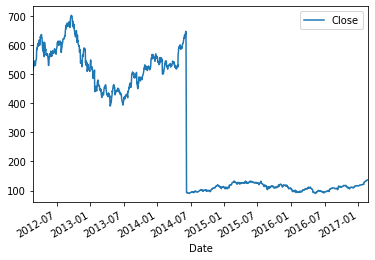

In [5]:
# временые ряды      pandas.to_datetime.

df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
df = df.sort_index()
print(df.info())

df.loc['2012-Feb', 'Close'].mean() #узнаем среднюю цену акции (mean) на закрытии (Close):

df.loc['2012-Feb':'2015-Feb', 'Close'].mean() 

#среднюю цену закрытия по неделям
df.resample('W')['Close'].mean() #Resampling мощный инструмент при работе с временными рядами (time series), помогающий переформировать выборку так, как удобно вам. 
#Метод resample первым аргументом принимает строку rule


import matplotlib.pyplot as plt

new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
#plt.show()



